# Question 1

Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
time = 20
offset = 1000
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}
combined_dir = os.path.join("../Combined")
dataset_dir = os.path.join(combined_dir, "Train")  # Focus on the training set

# Load and prepare data
X_train = [] # Sensor data
y_train = [] # Activity labels

# Get acitivity data
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    # Only get the first file for each activity
    file = files[5]

    df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
    # Skip first 100 rows and get 50 seconds of data to avoid initial and ending noise
    df = df[offset:offset + time * 50]

    X_train.append(df.values)
    y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape) # 3D array
print("y_train shape:", y_train.shape) # 1D array

X_train shape: (6, 1000, 3)
y_train shape: (6,)


(array([3]),)
(array([5]),)
(array([4]),)
(array([1]),)
(array([2]),)
(array([0]),)


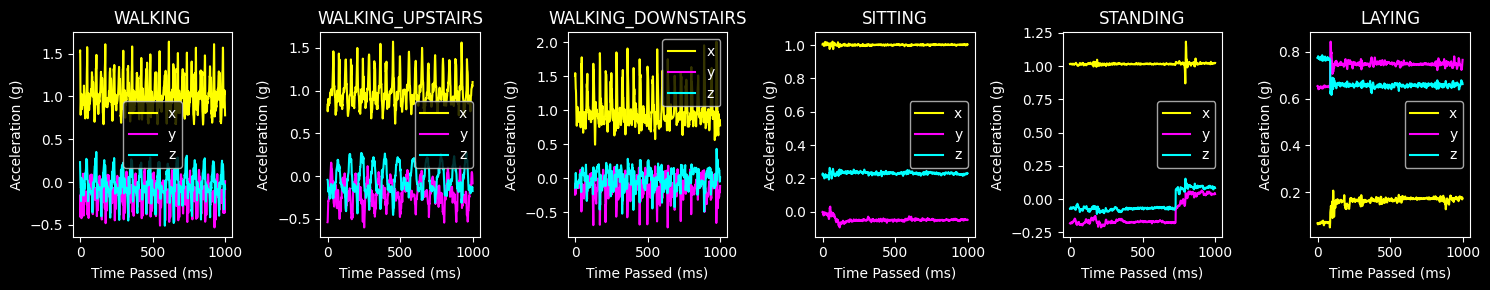

In [96]:
# Define a list of activities
activities = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

# Create a figure and axes for subplots with 6 columns and 1 row
fig, axes = plt.subplots(figsize=(15, 3), nrows=1, ncols=6)

# Iterate through each activity
for i, activity in enumerate(activities):
    # Find the index of the first sample data (y_train) that corresponds to a specific activity class.
    # Since y_train is a 1D array, we can use np.where to find the index of the first occurrence of the activity class.
    act_ind = np.where(y_train == (i + 1))[0][0]
    print(np.where(y_train == (i + 1)))
    sample_data = X_train[act_ind]

    # Plot the accelerometer data for each axis
    axes[i].plot(sample_data[:, 0], label='x', color='yellow')
    axes[i].plot(sample_data[:, 1], label='y', color='magenta')
    axes[i].plot(sample_data[:, 2], label='z', color='cyan')

    # Set the title and labels
    axes[i].set_title(activity)
    axes[i].set_xlabel('Time Passed (ms)')
    axes[i].set_ylabel('Acceleration (g)')
    axes[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Observations:**

Following observations are general to all the sample data.

1. Laying: The acceleration in the x-axis is low, nearly 0. This is likely due to the orientation of the phone being flat, which makes the x-axis horizontal. Moreover, the x-axis acceleration is fairly stable compared to dynamic situations. The y-axis and z-axis accelerations are in an almost vertical direction, and taking the square roots of their squared sums would get us nearly to 1. The graph of this activity doesn't perform laying from other positions; it is the laying position throughout.

2. Standing: The acceleration in the x-axis is high, nearly 1. This is likely due to the orientation of the phone being vertical, which makes the x-axis vertical. Moreover, the x-axis acceleration is fairly stable compared to dynamic situations. The y-axis and z-axis acceleration again vary due to changes in the orientation of the phone in those axes. The graph of this activity doesn't perform laying from other positions; it is the laying position throughout.

3. Sitting: The graph of this activity performs the sitting action from another position which cases a significant change in the accelerations. The x-axis acceleration increases for a certain amount of time when the person is sitting, since the phone practically moves downwards there is a upward bump in the x-axis acceleration. When the person has been sat, the x-axis acceleration returns to what it was before. The y and z axes change of acceleration doeesn't really mean anything, its just the way a person sits which also affects those axes.

4. All the dynamic activities show unstable varying accelerations along all the axes. The x-axis acceleration stay near 1 as the phone is in vertical position which makes the x-axis also vertical. It varies heavily due to the body's motion. The y and z axes acceleration stay near 0 as these axes are horizontal.

5. Distinguishing between the dynamic situation and the static situation can be done by looking at how freqently do the accelerations vary.

6. Distinguishing between the static situations can be done as each have unique characteristics discussed in points 1, 2 and

7. Distinguishing between the dynamic situations seems difficult upfront due to lack of any unique patterns or characteristics of these activities. However, upon having a closer look at the patterns, an ML model might be able to distinguish but probably with not so significant accuracy.

**Verdict:** The ML model can differentiate dynamic and static situations, and identify activities in static situations. However, it may struggle to accurately distinguish activities within dynamic situations.
